In [2]:
%pylab inline

from pathlib import Path
import sys
pth = Path("~/projects/bodynavigation").expanduser()
print(pth, pth.exists())
sys.path.insert(0, str(pth))

import matplotlib.pyplot as plt
import glob

import io3d
import sed3
import SimpleITK as sitk

import bodynavigation

import matplotlib.pyplot as plt
print(bodynavigation.__file__)

Populating the interactive namespace from numpy and matplotlib
C:\Users\Jirik\projects\bodynavigation True
C:\Users\Jirik\projects\bodynavigation\bodynavigation\__init__.py


In [3]:
# pth=Path(r"g:\Můj disk\data\medical\orig\sliver07\training\liver-seg001.mhd")
# pth.exists()
datap = io3d.datasets.read_dataset("3Dircadb1", 'data3d', 1)
data3d = datap["data3d"]
voxelsize_mm = datap["voxelsize_mm"]

2020-11-19 16:01:20.517 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-11-19 16:01:20.569 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_.
2020-11-19 16:01:20.574 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical
2020-11-19 16:01:20.578 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig
2020-11-19 16:01:20.582 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig/3Dircadb1.1
2020-11-19 16:01:20.585 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig/3Dircadb1.1/PATIENT_DICOM
2020-11-19 16:01:20.588 | DEBUG    | io3d.datasets:dataset_path:536 - returning path=C:\Users\Jirik\data , new_path_to_join=medical\orig\3Dircadb1.1\PATIENT_DICOM
2020-11-19 16:01:20.591 | DEBUG    | io3d.datasets:joinp:345 - sample_data_path

2020-11-19 16:01:20.867 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_33
2020-11-19 16:01:20.874 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_34
2020-11-19 16:01:20.880 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_35
2020-11-19 16:01:20.886 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_36
2020-11-19 16:01:20.893 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_37
2020-11-19 16:01:20.900 | DEBUG    | io3d.dcmreaddata:get_3Ddata:

2020-11-19 16:01:21.206 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_77
2020-11-19 16:01:21.213 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_78
2020-11-19 16:01:21.222 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_79
2020-11-19 16:01:21.228 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_80
2020-11-19 16:01:21.233 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_81
2020-11-19 16:01:21.240 | DEBUG    | io3d.dcmreaddata:get_3Ddata:

2020-11-19 16:01:21.546 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_121
2020-11-19 16:01:21.553 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_122
2020-11-19 16:01:21.561 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_123
2020-11-19 16:01:21.570 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_124
2020-11-19 16:01:21.577 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_125
2020-11-19 16:01:21.584 | DEBUG    | io3d.dcmreaddata:get_3D

In [4]:
ss = bodynavigation.body_navigation.BodyNavigation(data3d, voxelsize_mm)

In [5]:
# sitk.ReadImage(str(pth))
# sitk.ReadImage("g:/Můj disk/data/medical/orig/sliver07/training/liver-seg001.mhd")
# sitk.ReadImage("h:/medical/orig/sliver07/training/liver-seg001.mhd")

In [6]:
def show_dists(dist,i=100, j=200):
    fig, axs = plt.subplots(
        2,2, 
#         sharey=True, 
        figsize=[15,12])
    axs = axs.flatten()
    axs[0].imshow(data3d[i,:,:], cmap='gray')
    
    axs[1].imshow(dist[i,:,:])
    axs[1].contour(dist[i,:,:]>0)
    axs[2].imshow(data3d[:,j,:], cmap='gray')
    axs[3].imshow(dist[:,j,:])
    axs[3].contour(dist[:,j,:]>0)
    
    for ax in axs:
        ax.axis('off')

    # plt.contour(dist[100,:,:], ax=axs[1])

# Surface

2020-11-19 16:01:29.111 | DEBUG    | imma.image:resize_to_shape:93 - resize to orig with skimage


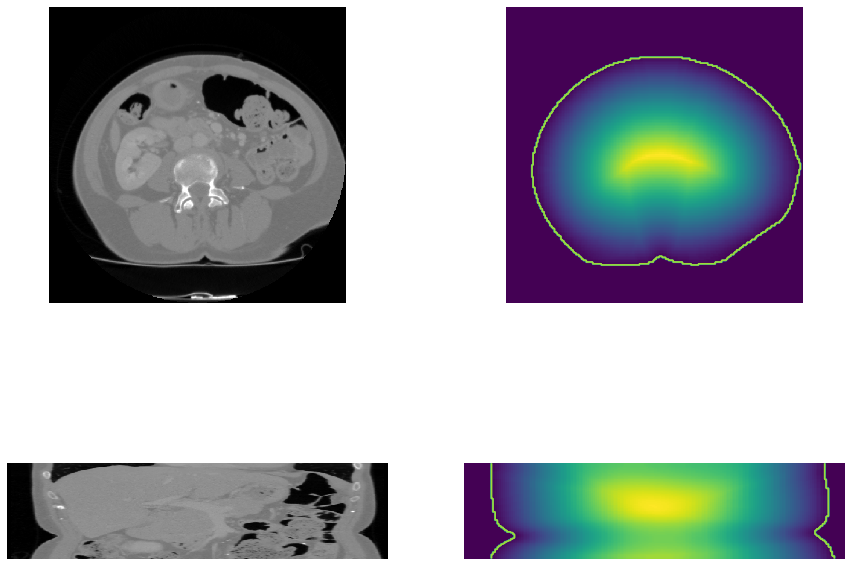

In [7]:
dist = ss.dist_to_surface()
show_dists(dist)

# Spine

C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]


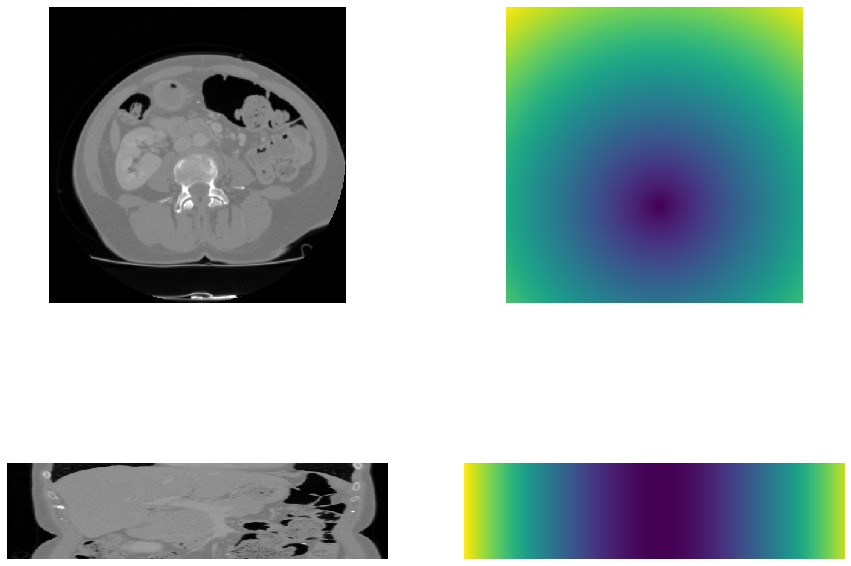

In [8]:
dist = ss.dist_to_spine()
show_dists(dist)

# Lungs

2020-11-19 16:01:39.444 | DEBUG    | imma.image:resize_to_shape:93 - resize to orig with skimage
2020-11-19 16:01:43.833 | DEBUG    | imma.image:resize_to_shape:93 - resize to orig with skimage


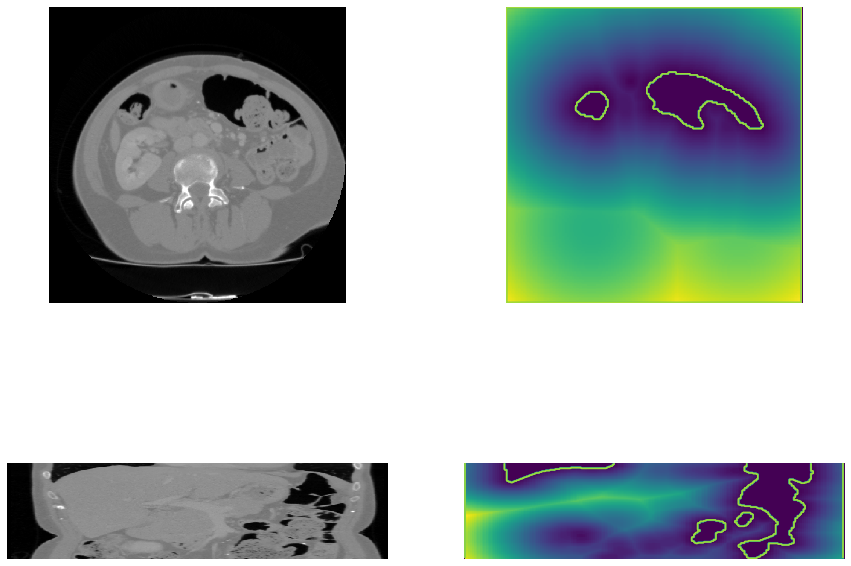

In [9]:
dist = ss.dist_to_lungs()
show_dists(dist)

# Sagittal plane

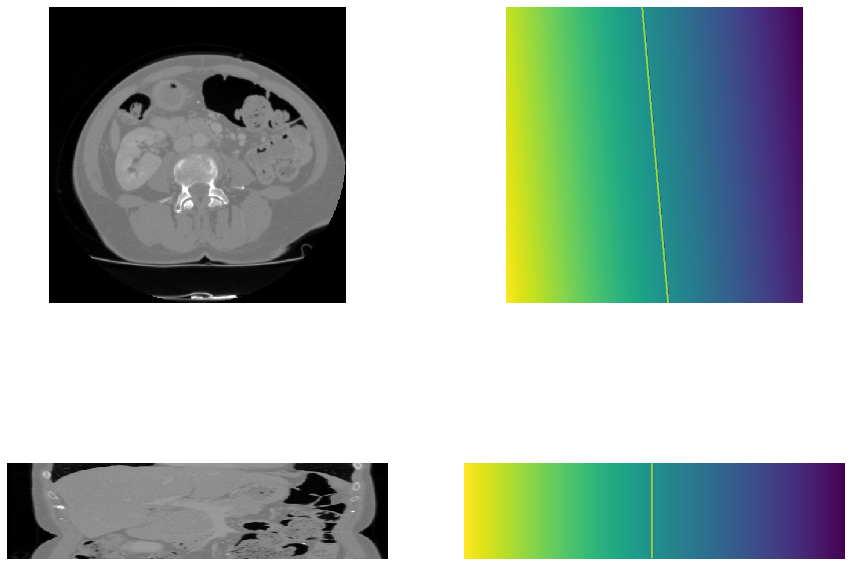

In [10]:
dist = ss.dist_to_sagittal()
show_dists(dist)